# WeatherPy
----

## Observations and Insights
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
city_df = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pd.set_option("max_columns", len(city_df.columns))
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
responses = [];
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
            
# Print the city count to confirm sufficient count
city_count = len(cities)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sistranda"
query_url = url + "appid=" + api_key + "&q=" + city
response = requests.get(query_url).json()
response

{'coord': {'lon': 8.83, 'lat': 63.73},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 274.7,
  'feels_like': 265.17,
  'temp_min': 274.15,
  'temp_max': 275.37,
  'pressure': 1001,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 9.8, 'deg': 140},
 'clouds': {'all': 98},
 'dt': 1584221781,
 'sys': {'type': 1,
  'id': 1647,
  'country': 'NO',
  'sunrise': 1584164728,
  'sunset': 1584206534},
 'timezone': 3600,
 'id': 3139597,
 'name': 'Sistranda',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build partial query URL
# query_url = f"{url}appid={api_key}&q="
query_url = url + "appid=" + api_key + "&q="
# set up lists to hold reponse info
lat = []
lng = []
temp_max = []
humidity = []
wind = []
clouds = []
dt = []
country = []
final_city = []
# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities[:605]):
    try:
        response=requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        dt.append(response['dt'])
        country.append(response['sys']['country'])
        final_city.append(city)
        print(f"city number is {index} {city}")
    except:
        print("city not found")

city number is 0 butaritari
city number is 1 te anau
city number is 2 muzhi
city not found
city number is 4 mount gambier
city number is 5 hilo
city number is 6 tondano
city number is 7 caranavi
city number is 8 atar
city number is 9 bluff
city number is 10 busselton
city number is 11 san andres
city not found
city number is 13 yurgamysh
city number is 14 rikitea
city number is 15 kapaa
city number is 16 ribeira grande
city number is 17 port alfred
city number is 18 half moon bay
city number is 19 xai-xai
city number is 20 dunedin
city number is 21 tuatapere
city number is 22 nexo
city number is 23 nikolskoye
city number is 24 san patricio
city number is 25 ushuaia
city number is 26 provideniya
city number is 27 valdivia
city number is 28 new norfolk
city number is 29 asau
city number is 30 roela
city number is 31 dutse
city number is 32 east london
city number is 33 punta arenas
city number is 34 zhigansk
city number is 35 khatanga
city number is 36 amga
city number is 37 airai
city n

city number is 309 broome
city number is 310 bandar-e lengeh
city number is 311 tecate
city number is 312 oktyabrskoye
city number is 313 norman wells
city number is 314 udachnyy
city number is 315 hirara
city not found
city not found
city number is 318 tevriz
city number is 319 lata
city number is 320 otradnoye
city number is 321 vieques
city number is 322 calabozo
city number is 323 havelock
city number is 324 souillac
city number is 325 alice springs
city number is 326 mayo
city number is 327 watsa
city number is 328 male
city number is 329 along
city not found
city number is 331 omboue
city number is 332 mirnyy
city number is 333 nara
city number is 334 boddam
city number is 335 talnakh
city not found
city not found
city number is 338 husavik
city number is 339 fukue
city number is 340 inirida
city number is 341 sahuaripa
city number is 342 laguna
city not found
city number is 344 codrington
city number is 345 kirakira
city number is 346 ankazobe
city number is 347 talaya
city numb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# # Write DataFrame to CSV
city_df.to_csv("city_data.csv", encoding="utf-8", index=False)
city_df.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [7]:
city_data =pd.DataFrame({
   "City":final_city,"Cloudiness":clouds,
   "Country":country,"Date":dt,
   "Humidity":humidity,"Lat":lat,
   "Lng":lng,"Max Temp":temp_max,
    "Wind Speed":wind
}) 
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,100,KI,1584221802,70,3.07,172.79,301.82,4.08
1,te anau,100,NZ,1584221802,69,-45.42,167.72,283.72,1.11
2,muzhi,92,RU,1584221802,96,65.37,64.67,256.62,0.97
3,mount gambier,90,AU,1584221802,76,-37.83,140.77,285.15,3.10
4,hilo,75,US,1584221802,83,19.73,-155.09,297.15,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

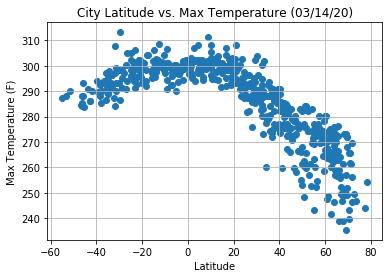

Temperature is inversely realted to Latitude, as latitude increases, the temperature falls


In [8]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker ='o')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x") ) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../output_data/tempinworld.png")
plt.show()
print(f'Temperature is inversely realted to Latitude, as latitude increases, the temperature falls')

#### Latitude vs. Humidity Plot

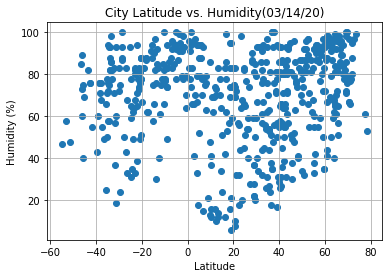

There is no relationship between temperature and humidity


In [9]:
plt.scatter(city_data['Lat'], city_data['Humidity'], marker ='o')
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/humidityinworld.png")
plt.show()
print(f'There is no relationship between temperature and humidity')

#### Latitude vs. Cloudiness Plot

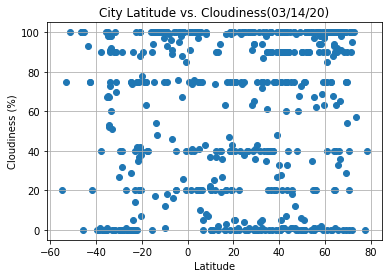

 Cloud coverage is more in higher altitude than in lower altitudes. Cloudiness is highest around 60s, and for latitude above 50N, the annual average cloud cover is about 70%.


In [10]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker ='o')
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/cloudinessinworld.png")
plt.show()
print(f' Cloud coverage is more in higher altitude than in lower altitudes. Cloudiness is highest \
around 60s, and for latitude above 50N, the annual average cloud cover is about 70%.')
# Reference: http://www-das.uwyo.edu/~geerts/cwx/notes/chap08/cloud_lat.html

#### Latitude vs. Wind Speed Plot

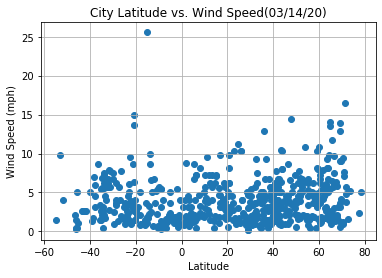

 There is no relationship between windspeed and latitude.


In [11]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker ='o')
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("../output_data/windspeedinworld.png")
plt.show()
print(f' There is no relationship between windspeed and latitude.')

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots
def plot_regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # with using the point, the lineregress will not appear for all the regressions,\
    # so I drew each of them separately.
    plt.annotate(line_eq,(0,10),fontsize=15,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue}")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
city_df_nh = city_data.loc[city_data["Lat"] >= 0] #len(city_df_nh)=380
city_df_sh = city_data.loc[city_data["Lat"] < 0] #len(city_df_sh)=168

The r-squared is: -0.871499407588105


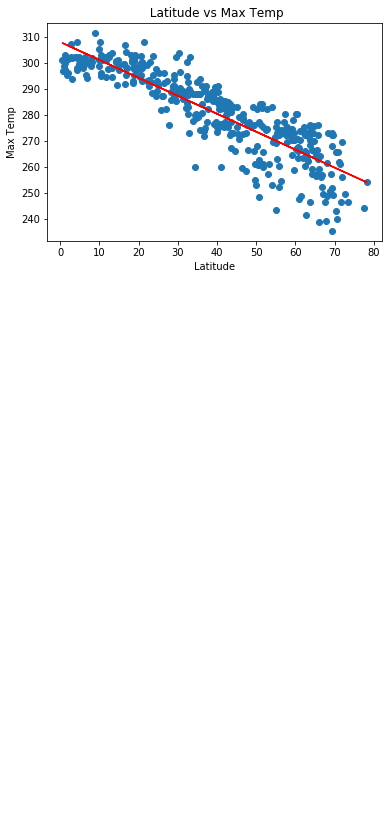

The r-squared is: 0.2704105738800171


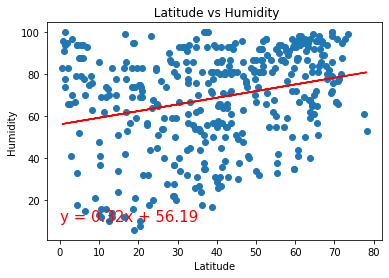

The r-squared is: 0.19115757680099796


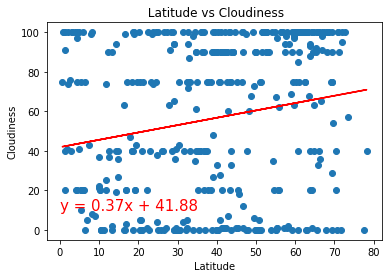

The r-squared is: 0.196746965457274


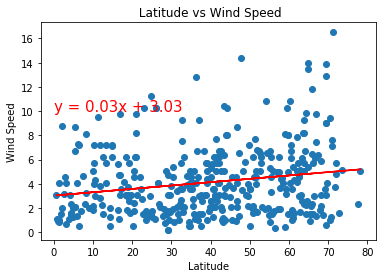

<Figure size 432x288 with 0 Axes>

In [17]:
var_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
counter=0
for variables in var_list:
    x_values = city_df_nh["Lat"]
    y_values = city_df_nh[var_list[counter]] #0 is associated with "Max Temp",1 is associated with"Humidity" and so on!
    plt.title(f" Latitude vs %s" % var_list[counter])
    plot_regression (x_values, y_values)
    plt.xlabel('Latitude')
    plt.ylabel(var_list[counter])
    plt.savefig("../Images/var_list[counter].png")
    plt.show()
    plt.clf()
    counter= counter + 1
    if counter ==4:
        break

In [ ]:
var_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
counter=0
for variables in var_list:
    x_values = city_df_sh["Lat"]
    y_values = city_df_sh[var_list[counter]] #0 is associated with "Max Temp",1 is associated with"Humidity" and so on!
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.title(f" Latitude vs %s" % var_list[counter])
    plot_regression (x_values, y_values)
    plt.xlabel('Latitude')
    plt.ylabel(var_list[counter])
    plt.savefig("../Images/var_list[counter].png")
    plt.annotate(line_eq,(-25,280),fontsize=15,color="red")
    plt.show()
    plt.clf()
    counter +=1
    if counter ==4:
        break

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("NH-Latitude vs Max Temp Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,270),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("SH-Latitude vs Max Temp Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,280),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("NH-Latitude vs Humidity(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("SH-Latitude vs Humidity(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,58),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("NH-Latitude vs Cloudiness(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("SH-Latitude vs Cloudiness(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,42),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("NH-Latitude vs Wind Speed (mph)Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,1.5),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("SH-Latitude vs Wind Speed (mph)Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,7),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()